In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
#os.chdir('../') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import imp
import minimetagenome_analysis as minimeta
#imp.reload(minimeta)

import reassembly as rea
import subcluster_bins as sub
import checkm_out_plot as cop
import checkm_out as co

this is a continuation (& cleaned up version of 201810_permafrost_analysis)
where I continue with post reassembly pruning

# SagMAT version

In [5]:
%pwd

'/home/bojk/Data'

In [41]:
expt_name = 'SagMAT'

In [15]:
imp.reload(rea)
#readf = None
SMreadf = rea.make_CS_df_new_index('Permafrost/SagMAT/bins/fasta/reassembly/')#linux
#FBreadf = rea.make_CS_df_new_index('Permafrost/FranklinBluffs/reassembly_files/')#mac
SMreadf5kb = SMreadf[SMreadf['length_linecount']>=5e3]

No numeric data for bin 004, heading on to next.
Added read count and saved, time elapsed (hh:mm:ss.ms) 0:03:32.285463
8052 contigs above 5kb for reassembled SagMAT


In [21]:
SMreadf5kb.groupby('Bin').sum()['length_from_fasta'].sort_values(ascending=False)


Bin
056    3978386.0
048    3839433.0
065    3224892.0
033    3114789.0
041    2892102.0
023    2850000.0
069    2843256.0
061    2242012.0
049    2145703.0
042    2006401.0
047    1853013.0
043    1841483.0
039    1798022.0
054    1623784.0
011    1577787.0
014    1500135.0
034    1440309.0
058    1413267.0
000    1340084.0
008    1249740.0
059    1215279.0
036    1187087.0
006    1182034.0
045    1181938.0
052    1116724.0
055    1112401.0
062    1056519.0
060    1048349.0
030    1040655.0
068    1020755.0
         ...    
021     802688.0
038     796018.0
015     786561.0
026     740253.0
040     723545.0
050     704056.0
029     699003.0
037     692117.0
025     654525.0
031     641736.0
053     612132.0
064     569007.0
035     565134.0
022     395841.0
016     383910.0
007     355330.0
046     332241.0
018     200050.0
010     131443.0
009      77688.0
013      67916.0
012      53431.0
005      52310.0
020      41821.0
003      34345.0
017      31168.0
028      26694.0
027      1

In [22]:
len(SMreadf5kb)

8052

In [23]:
len(SMreadf[SMreadf['length_from_fasta']>=5e3])

8401

In [25]:
SMreadf.columns

Index(['15cm_mean', '15cm_median', '15cm_std', '25cm_mean', '25cm_median',
       '25cm_std', 'Bin', 'GC', 'absCov_15cm', 'absCov_25cm', 'class_count',
       'class_mean', 'class_median', 'length', 'length_diff(%)',
       'length_diff(abs)', 'length_from_fasta', 'length_linecount',
       'norCov_15cm', 'norCov_25cm', 'expt_name', 'new_index',
       'depthfrac15cm'],
      dtype='object')

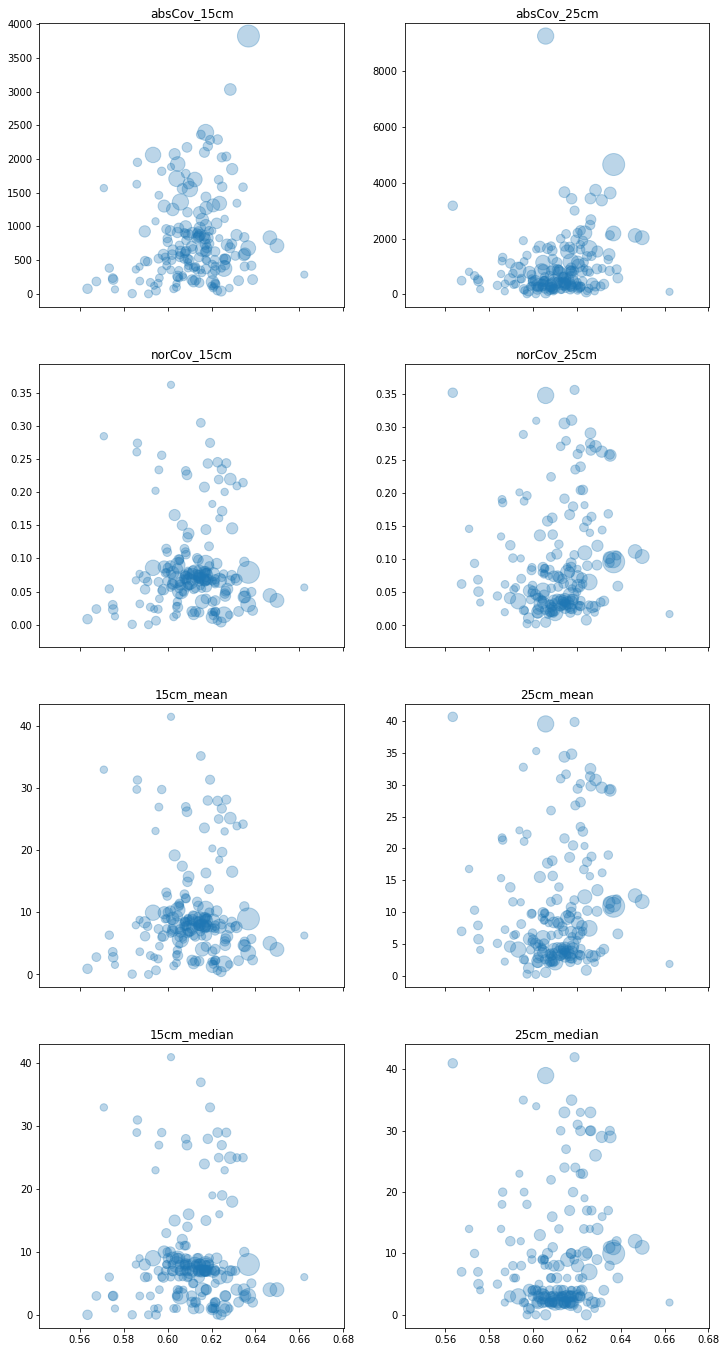

In [28]:
#FBreadf5kb = FBreadf[FBreadf['length']>=5000]
f, ax = plt.subplots(4,2, sharex=True,figsize=(12,24))
bin000 = SMreadf5kb[SMreadf5kb['Bin']=='039']
d1 = '15cm'
d2 = '25cm'
ax[0][0].scatter(bin000['GC'],bin000['absCov_'+d1],s=bin000['length']/1e2,alpha=.3)
ax[0][0].set_title('absCov_'+d1)
ax[0][1].scatter(bin000['GC'],bin000['absCov_'+d2],s=bin000['length']/1e2,alpha=.3)
ax[0][1].set_title('absCov_'+d2)
ax[1][0].scatter(bin000['GC'],bin000['norCov_'+d1],s=bin000['length']/1e2,alpha=.3)
ax[1][0].set_title('norCov_'+d1)
ax[1][1].scatter(bin000['GC'],bin000['norCov_'+d2],s=bin000['length']/1e2,alpha=.3)
ax[1][1].set_title('norCov_'+d2)

ax[2][0].scatter(bin000['GC'],bin000[d1+'_mean'],s=bin000['length']/1e2,alpha=.3)
ax[2][0].set_title(d1+'_mean')
ax[2][1].scatter(bin000['GC'],bin000[d2+'_mean'],s=bin000['length']/1e2,alpha=.3)
ax[2][1].set_title(d2+'_mean')
ax[3][0].scatter(bin000['GC'],bin000[d1+'_median'],s=bin000['length']/1e2,alpha=.3)
ax[3][0].set_title(d1+'_median')
ax[3][1].scatter(bin000['GC'],bin000[d2+'_median'],s=bin000['length']/1e2,alpha=.3)
ax[3][1].set_title(d2+'_median')
#plt.xlim(0.3,.5)
plt.show()


OK, so median and mean are completely different here, let's have a look what's going on. 

In [30]:
bin000.sort_values('absCov_25cm',ascending=False).head()

,15cm_mean,15cm_median,15cm_std,25cm_mean,25cm_median,25cm_std,Bin,GC,absCov_15cm,absCov_25cm,...,length,length_diff(%),length_diff(abs),length_from_fasta,length_linecount,norCov_15cm,norCov_25cm,expt_name,new_index,depthfrac15cm
039_NODE_002,5.658722,3.0,7.084648,39.500038,39.0,9.727949,039,0.605802,1362.0,9266.0,...,26644.0,0.000000,0.0,26644.0,26644.0,0.051118,0.347771,SagMAT,SagMAT_bin_039_039_NODE_002,0.128152
039_NODE_001,8.941989,8.0,4.056286,10.937565,10.0,4.302443,039,0.636820,3822.0,4656.0,...,48370.0,0.000000,0.0,48370.0,48370.0,0.079016,0.096258,SagMAT,SagMAT_bin_039_039_NODE_001,0.450814
039_NODE_025,25.145353,25.0,13.487705,30.728433,26.0,18.194915,039,0.628551,3030.0,3736.0,...,13794.0,0.043478,6.0,13800.0,13794.0,0.219565,0.270725,SagMAT,SagMAT_bin_039_039_NODE_025,0.447827
039_NODE_036,7.902419,6.0,6.624831,34.354212,33.0,10.596980,039,0.614345,856.0,3664.0,...,11990.0,0.000000,0.0,11990.0,11990.0,0.071393,0.305588,SagMAT,SagMAT_bin_039_039_NODE_036,0.189381
039_NODE_022,4.598839,3.0,5.253472,29.105245,29.0,8.392813,039,0.635218,594.0,3634.0,...,14129.0,0.000000,0.0,14129.0,14129.0,0.042041,0.257202,SagMAT,SagMAT_bin_039_039_NODE_022,0.140492


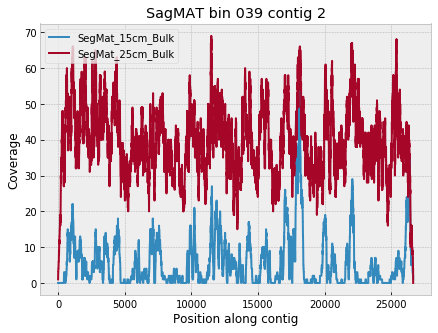

In [38]:
#pd.read_table('Permafrost/FranklinBluffs/bins/fasta/reassembly/shotgunReads_absoluteRealignmentReadCount.000.txt')
binn = '039'
env='linux'
colname = 'SegMat'
expt_name = 'SagMAT'
if env=='linux':
    bin_000 = pd.read_table('Permafrost/'+expt_name+'/bins/fasta/reassembly/shotgunReads_realignmentDepthProfile.'+binn+'.txt')#linux_quake
elif env=='mac':
    bin_000 = pd.read_table('Permafrost/'+expt_name+'/reassembly_files/shotgunReads_realignmentDepthProfile.'+binn+'.txt')#mac
f,ax = plt.subplots() 
plt.style.use(['bmh'])
#'NODE_16_length_9207_cov_5.81697'
#plt.rcParams.update(plt.rcParamsDefault)
num = '2'
bin_000[bin_000['ContigName'].str.contains('NODE_'+num+'_le')].reset_index()[[colname+'_'+d1+'_Bulk',colname+'_'+d2+'_Bulk']].plot(ax=ax,figsize=(7,5))
plt.ylabel('Coverage')
plt.xlabel('Position along contig')
plt.title(expt_name+' bin '+binn+' contig '+num)
#plt.gcf().subplots_adjust(left=0.25,right=0.99,bottom=0.43,top=0.99)
if env=='linux':
    f.savefig('Permafrost/'+expt_name+'/bins/fasta/reassembly/coverage_bin_'+binn+'_contig'+num+'.png')
    f.savefig('Permafrost/'+expt_name+'/bins/fasta/reassembly/coverage_bin_'+binn+'_contig'+num+'.pdf')
elif env=='mac':
    f.savefig('Permafrost/'+expt_name+'/reassembly_plots/coverage_bin_'+binn+'_contig'+num+'.png')
    f.savefig('Permafrost/'+expt_name+'/reassembly_plots/coverage_bin_'+binn+'_contig'+num+'.pdf')

In [39]:
SMreadf5kb.columns[SMreadf5kb.columns.str.contains('cm_mean')]

Index(['15cm_mean', '25cm_mean'], dtype='object')

In [40]:
SMreadf5kb.columns

Index(['15cm_mean', '15cm_median', '15cm_std', '25cm_mean', '25cm_median',
       '25cm_std', 'Bin', 'GC', 'absCov_15cm', 'absCov_25cm', 'class_count',
       'class_mean', 'class_median', 'length', 'length_diff(%)',
       'length_diff(abs)', 'length_from_fasta', 'length_linecount',
       'norCov_15cm', 'norCov_25cm', 'expt_name', 'new_index',
       'depthfrac15cm'],
      dtype='object')

# compare pre-post reassembly

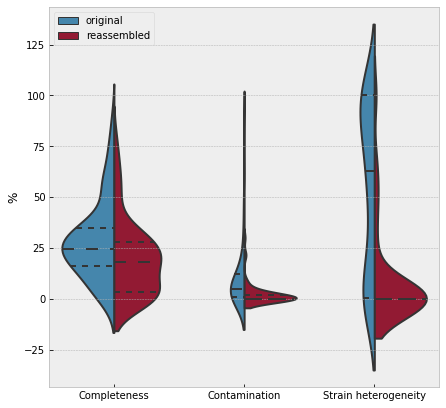

In [49]:
imp.reload(cop)
indir_reassembly = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/genomes_5kbfilter/CheckM/'
indir_originals = 'Permafrost/'+expt_name+'/bins/fasta/originals/checkm_SM/'
chkm_orig = co.make_checkm_output_df(indir_originals,'tempcheckmdf')
chkm_orig['dataset'] = 'original'
chkm_reas = co.make_checkm_output_df(indir_reassembly,'tempcheckmdf')
chkm_reas['dataset'] = 'reassembled'
cop.compare_two_checkmdfs(chkm_orig,chkm_reas,'dataset',indir_reassembly,expt_name+'_comparison_pre-post_reassembly')        

The completeness of these datasets really sucks.

## 1. bins that are ok before reassembly

In [291]:
okbefore = chkm_orig[(chkm_orig['Contamination']<=5)&(chkm_orig['Strain heterogeneity']<=5)].index
chkm_orig[(chkm_orig['Contamination']<=5)&(chkm_orig['Strain heterogeneity']<=5)][['Completeness','Contamination','Strain heterogeneity','Genome size']]

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
SagMAT_bin_034,36.442,3.44828,0.0,1658009
SagMAT_bin_049,32.0533,3.44828,0.0,2606911
SagMAT_bin_002,29.3718,0.294118,0.0,2472213
SagMAT_bin_040,23.4326,0,0.0,847440
SagMAT_bin_007,22.6489,0,0.0,1206273
SagMAT_bin_010,19.8276,1.72414,0.0,1328834
SagMAT_bin_058,14.6486,1.7094,0.0,1968010
SagMAT_bin_016,8.33333,4.16667,0.0,1582884
SagMAT_bin_059,6.89655,0,0.0,1839759


In [292]:
okbefidx = ['genome_contigs_withBulk.'+f[-3:]+'.5000bp_filter' for f in okbefore]
chkm_reas[chkm_reas.index.isin(okbefidx)][['Completeness','Contamination','Strain heterogeneity','Genome size']]

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
genome_contigs_withBulk.034.5000bp_filter,36.442,3.44828,0.0,1440309
genome_contigs_withBulk.049.5000bp_filter,28.4483,1.72414,0.0,2145338
genome_contigs_withBulk.040.5000bp_filter,19.9843,0,0.0,723545
genome_contigs_withBulk.058.5000bp_filter,14.4587,1.7094,0.0,1413267
genome_contigs_withBulk.002.5000bp_filter,4.31034,0,0.0,572891
genome_contigs_withBulk.007.5000bp_filter,4.16667,0,0.0,353731
genome_contigs_withBulk.066.5000bp_filter,4.16667,0,0.0,838997
genome_contigs_withBulk.059.5000bp_filter,3.44828,0,0.0,1215279
genome_contigs_withBulk.064.5000bp_filter,3.44828,0,0.0,569007


## 2. bins that needed reassembly, and pass now

In [293]:
#chkm_orig[(chkm_orig['Contamination']>=5)|(chkm_orig['Strain heterogeneity']>=5)]

In [294]:
bins_for_reass = chkm_orig[(chkm_orig['Contamination']>=5)|(chkm_orig['Strain heterogeneity']>=5)].index.str[-3:]
indices = ['genome_contigs_withBulk.'+f+'.5000bp_filter' for f in bins_for_reass]
chkm_reas[chkm_reas.index.isin(indices)&(chkm_reas['Contamination']<=5)&(chkm_reas['Strain heterogeneity']<=5)]
#chkm_reas.sort_index()[['Completeness','Contamination','Strain heterogeneity','Genome size']][30:]
#chkm_orig.sort_index()[['Completeness','Contamination','Strain heterogeneity','Genome size']]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,dataset
0,,,,,,,,,,,,,,,,,
genome_contigs_withBulk.033.5000bp_filter,p__Bacteroidetes,79.1133,0.738916,98,3114789,364,203,302,2738,0.910484,0.443493,0.00996389,148420,31783.6,44806,0.0,reassembled
genome_contigs_withBulk.006.5000bp_filter,c__Betaproteobacteria,65.0399,0,114,1182034,323,234,387,1280,0.915964,0.478558,0.0133113,36648,10368.7,11133,0.0,reassembled
genome_contigs_withBulk.048.5000bp_filter,c__Deltaproteobacteria,50.9892,2.58065,110,3839433,83,155,247,3530,0.906641,0.647309,0.0118705,150732,34903.9,45767,0.0,reassembled
genome_contigs_withBulk.029.5000bp_filter,k__Bacteria,34.3887,1.72414,92,699003,5449,58,104,746,0.928218,0.561824,0.0109062,17783,7597.86,7968,0.0,reassembled
genome_contigs_withBulk.055.5000bp_filter,o__Rhizobiales,33.3516,1.72612,132,1112401,107,316,485,1127,0.904928,0.617894,0.0134953,34689,8427.27,8474,0.0,reassembled
genome_contigs_withBulk.060.5000bp_filter,k__Bacteria,32.4561,0,103,1048349,5449,57,103,1135,0.853083,0.571797,0.00981141,28552,10178.1,10616,0.0,reassembled
genome_contigs_withBulk.057.5000bp_filter,k__Bacteria,31.5789,0,72,822501,5449,57,103,912,0.836277,0.566364,0.0148531,35369,11423.6,12331,0.0,reassembled
genome_contigs_withBulk.047.5000bp_filter,c__Deltaproteobacteria,28.3492,0,100,1858024,83,155,247,1691,0.913347,0.649401,0.0111835,61357,18580.2,20965,0.0,reassembled
genome_contigs_withBulk.000.5000bp_filter,k__Bacteria,28.0702,0,175,1340084,5449,57,102,1304,0.925929,0.674793,0.0170125,22945,7657.62,7300,0.0,reassembled


## 3. bins that did not pass reassembly and need pruning

In [296]:
bins_for_pruning = chkm_reas[chkm_reas.index.isin(indices)&((chkm_reas['Contamination']>5)|(chkm_reas['Strain heterogeneity']>5))].index
chkm_reas[chkm_reas.index.isin(indices)&((chkm_reas['Contamination']>5)|(chkm_reas['Strain heterogeneity']>5))]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity,dataset
0,,,,,,,,,,,,,,,,,
genome_contigs_withBulk.011.5000bp_filter,k__Bacteria,70.766,30.9671,232,1577787,924,108,161,1666,0.944434,0.68775,0.0131365,16369,6800.8,6258,0.00,reassembled
genome_contigs_withBulk.056.5000bp_filter,k__Bacteria,60.3448,8.62069,337,3978388,5449,58,104,4129,0.86192,0.604887,0.0176328,77675,11805.3,13529,0.00,reassembled
genome_contigs_withBulk.014.5000bp_filter,k__Bacteria,55.3498,9.21811,217,1505143,924,108,161,1623,0.944477,0.689725,0.0125698,21274,6936.14,6779,4.17,reassembled
genome_contigs_withBulk.041.5000bp_filter,k__Bacteria,51.0972,21.1599,417,2890306,5449,58,104,2910,0.926935,0.633962,0.015531,24149,6931.18,6499,42.31,reassembled
genome_contigs_withBulk.023.5000bp_filter,k__Bacteria,39.9687,22.884,278,2850000,5449,58,103,3036,0.889766,0.664321,0.0160687,42573,10251.8,10745,0.00,reassembled
genome_contigs_withBulk.042.5000bp_filter,c__Deltaproteobacteria,34.9631,2,260,2006401,83,155,247,1910,0.932765,0.65137,0.0106348,24924,7716.92,7506,50.00,reassembled
genome_contigs_withBulk.068.5000bp_filter,k__Bacteria,30.4075,0.940439,129,1020755,5449,58,104,1017,0.883537,0.554708,0.0108711,17768,7912.81,7909,66.67,reassembled
genome_contigs_withBulk.030.5000bp_filter,k__Bacteria,28.7083,3.64865,163,1051071,88,148,230,1029,0.927089,0.59197,0.0142665,18435,6448.27,6100,57.14,reassembled
genome_contigs_withBulk.024.5000bp_filter,k__Bacteria,25.8621,5.17241,127,1000581,5449,58,103,1025,0.908068,0.667115,0.0093067,18048,7878.57,7924,50.00,reassembled


In [58]:
import HTSeq

In [70]:
binn = '039'
file = '/home/bojk/Data/Permafrost/SagMAT/bins/fasta/originals/genome_cluster.'+binn+'.fasta'
file2 = '/home/bojk/Data/Permafrost/SagMAT/bins/fasta/reassembly/genome_contigs_withBulk.'+binn+'.fasta'
len_orig = [];len_reas=[]
for s in HTSeq.FastaReader(file):
    len_orig.append(len(s.seq))
for s in HTSeq.FastaReader(file2):
    len_reas.append(len(s.seq))

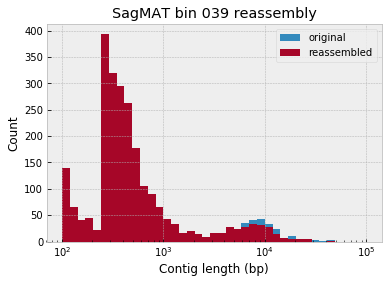

In [71]:
#old = plt.hist(len_orig,np.linspace(100,1e5,40))
f = plt.figure()
oldlog = plt.hist(len_orig,np.logspace(2,5,40))
newlog = plt.hist(len_reas,np.logspace(2,5,40))
plt.legend(['original','reassembled'])
plt.xlabel('Contig length (bp)')
plt.ylabel('Count')
plt.title('SagMAT bin '+binn+' reassembly')
plt.xscale('log')
f.savefig(indir_reassembly+'SM_bin_'+binn+'_reassembly.png')

In [79]:
sherlock_subsamples = pd.read_table('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples.txt')
newpath = '/scratch/users/berghuis/PermafrostSagMAT/'
sherlock_subsamples['biosample'] = newpath
sherlock_subsamples.to_csv('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples_new.txt','\t',index=False)

In [88]:
#pd.read_table('Permafrost/SagMAT/bins/fasta/reassembly/sherlock_subsamples_new.txt')

# Pruning reassembled bins 

In [297]:
len(bins_for_pruning)

16

In [298]:
# won't be using this for SagMAT since there are only 16 reassembled bins that need pruning.
"""imp.reload(sub)
fastadir = 'Permafrost/FranklinBluffs/bins/fasta/reassembly/'
pickle = fastadir+'FranklinBluffs_reassembly_contig_stats.pickle'
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',
       'expt_name','write_fasta']
values = [30,1,'eom',True,'FranklinBluffs','YES']
kwargs = dict(zip(keys,values))
sub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)"""

"imp.reload(sub)\nfastadir = 'Permafrost/FranklinBluffs/bins/fasta/reassembly/'\npickle = fastadir+'FranklinBluffs_reassembly_contig_stats.pickle'\nkeys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',\n       'expt_name','write_fasta']\nvalues = [30,1,'eom',True,'FranklinBluffs','YES']\nkwargs = dict(zip(keys,values))\nsub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)"

# bin-specific parameter selection

In [315]:
import checkm_out as co

In [325]:
bins_for_pruning.sort_values()

Index(['genome_contigs_withBulk.011.5000bp_filter',
       'genome_contigs_withBulk.014.5000bp_filter',
       'genome_contigs_withBulk.015.5000bp_filter',
       'genome_contigs_withBulk.022.5000bp_filter',
       'genome_contigs_withBulk.023.5000bp_filter',
       'genome_contigs_withBulk.024.5000bp_filter',
       'genome_contigs_withBulk.030.5000bp_filter',
       'genome_contigs_withBulk.036.5000bp_filter',
       'genome_contigs_withBulk.039.5000bp_filter',
       'genome_contigs_withBulk.041.5000bp_filter',
       'genome_contigs_withBulk.042.5000bp_filter',
       'genome_contigs_withBulk.052.5000bp_filter',
       'genome_contigs_withBulk.056.5000bp_filter',
       'genome_contigs_withBulk.062.5000bp_filter',
       'genome_contigs_withBulk.068.5000bp_filter',
       'genome_contigs_withBulk.069.5000bp_filter'],
      dtype='object', name=0)

In [404]:
binn = '069'

In [405]:
chkm_orig[chkm_orig.index.str.contains('_'+binn)][['Completeness','Contamination','Strain heterogeneity','Genome size']]

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
SagMAT_bin_069,16.6667,8.33333,0.0,3382122


In [406]:
chkm_reas[chkm_reas.index.str.contains('.'+binn+'.')][['Completeness','Contamination','Strain heterogeneity','Genome size']].sort_values(0)

,Completeness,Contamination,Strain heterogeneity,Genome size
0,,,,
genome_contigs_withBulk.069.5000bp_filter,16.6667,8.33333,0.0,2843256


In [409]:
imp.reload(sub)
fastadir = 'Permafrost/'+expt_name+'/bins/fasta/reassembly/genomes_5kbfilter/'
pickle = fastadir+expt_name+'_reassembly_contig_stats.pickle'
keys = ['min_cluster_size','min_samples','cluster_selection_method','allow_single_cluster',
       'expt_name','write_fasta','Bin','GC_sensitive']#,'GCmin','GCmax']
values = [45,1,'eom',False,expt_name,'NO',binn,'YES']#,.65,.79]
kwargs = dict(zip(keys,values))
sub.subcluster_bin_post_reassembly(pickle,fastadir,**kwargs)

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

#  now rewrite all fastas

In [411]:
imp.reload(sub)
sub.write_subfasta_from_jsonparams(pickle,fastadir+'pruning/json/',fastadir)

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in[subclunum] = ["{0:0=3d}".format(f) if f>=0 else f for f in labels] #add cluster numbers to main df
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_in['GC_sensitive'] = df_in['GC'].multiply(100)
/home/bojk/Data/minimeta_pyfiles/subcluster_bins.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

# make final collection of bins FB

In [1026]:
indir = fastadir+'pruning/fastas/checkm/'
checkm_pruned2 = co.make_checkm_output_df(indir,'FB_prune2')

In [1036]:
checkm_pruned2[(checkm_pruned2['Contamination']<=5)&(checkm_pruned2['Strain heterogeneity']<=5)].head()

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
FranklinBluffs_bin_019_55cm_sub_bin_000,k__Bacteria,65.4545,0.909091,67,1449635,924,110,163,1472,0.922567,0.562303,0.010454,104433,21636.3,31960,0.0
FranklinBluffs_bin_019_40cm_sub_bin_000,k__Bacteria,60.9091,0.909091,65,1428051,924,110,163,1445,0.923695,0.562468,0.0107087,104433,21970,31960,0.0
FranklinBluffs_bin_066_55cm_sub_bin_000,k__Bacteria,59.8291,0.854701,78,1953938,2258,117,188,1763,0.881901,0.605441,0.0065294,100680,25050.5,33845,0.0
FranklinBluffs_bin_001_55cm_sub_bin_000,k__Bacteria,57.1676,0.819672,153,1794647,433,183,273,1754,0.888318,0.354487,0.01294,46643,11729.7,12986,0.0
FranklinBluffs_bin_001_40cm_sub_bin_000,k__Bacteria,57.1676,0.546448,162,1853981,433,183,273,1811,0.886722,0.354461,0.0131308,46643,11444.3,12840,0.0


In [1037]:
# make original reassembled checkmdf again
indir = fastadir+'CheckM/'
FBcheckm_reassembled = co.make_checkm_output_df(indir,'bla')

In [1079]:
FBcheckm_reassembled[(FBcheckm_reassembled['Contamination']<=5)&(FBcheckm_reassembled['Strain heterogeneity']<=5)].head()

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
genome_contigs_withBulk.056.5000bp_filter,k__Bacteria,64.1162,0.909091,115,1994896,2258,110,181,2149,0.858638,0.572637,0.0117451,92468,17346.9,24421,0.0
genome_contigs_withBulk.005.5000bp_filter,p__Bacteroidetes,58.3856,0,214,2143843,364,202,302,1980,0.858635,0.413879,0.0200715,27363,10017.9,11184,0.0
genome_contigs_withBulk.015.5000bp_filter,k__Bacteria,49.0383,0,76,746174,2258,119,190,734,0.949722,0.673958,0.0146131,25576,9818.08,11116,0.0
genome_contigs_withBulk.014.5000bp_filter,k__Bacteria,48.9262,1.68067,83,783768,2258,119,190,770,0.953588,0.673773,0.0154173,36057,9442.99,10115,0.0
genome_contigs_withBulk.003.5000bp_filter,p__Bacteroidetes,44.802,0,225,2096528,364,202,302,1926,0.894564,0.414389,0.0128904,31993,9317.88,9659,0.0


In [1047]:
# these are the bins I went through individually and marked as 'no pruning needed'
ok_manual_selection = pd.read_csv(indir+'list_FB_reassembled_noPruningNeeded.csv',header=None)

In [1057]:
oklist = ["{0:0=3d}".format(int(f)) for f in ok_manual_selection[0]]
ok_from_checkm = [f.split('.')[1] for f in FBcheckm_reassembled[(FBcheckm_reassembled['Contamination']<=5)&(FBcheckm_reassembled['Strain heterogeneity']<=5)].index]

In [1064]:
# passes criteria in checkmdf, but did not make it to my manual 'OK'
missing = list(set(ok_from_checkm).difference(set(oklist)))
# on my ok list but not in checkm ok region (none)
list(set(oklist).difference(set(ok_from_checkm)))
missing

['032', '006', '123', '012', '011', '017', '009', '162']

In [1062]:
indices = ['genome_contigs_withBulk.'+f+'.5000bp_filter' for f in missing]
FBcheckm_reassembled[FBcheckm_reassembled.index.isin(indices)]

,marker lineage,Completeness,Contamination,# contigs,Genome size,# genomes,# marker sets,# markers,# predicted genes,Coding density,GC,GC std,Longest contig,Mean contig length,N50 (contigs),Strain heterogeneity
0,,,,,,,,,,,,,,,,
genome_contigs_withBulk.012.5000bp_filter,root,8.33333,0,79,499015,5656,24,56,478,0.897867,0.394355,0.0105792,14804,6316.65,6053,0.0
genome_contigs_withBulk.017.5000bp_filter,k__Bacteria,5.17241,0,88,738338,5449,58,104,704,0.899286,0.399853,0.0121572,17021,8390.2,8563,0.0
genome_contigs_withBulk.006.5000bp_filter,k__Bacteria,5.17241,0,66,591299,5449,58,104,591,0.890891,0.402594,0.0256219,30489,8959.06,8935,0.0
genome_contigs_withBulk.011.5000bp_filter,root,4.16667,0,25,189791,5656,24,56,190,0.905759,0.42747,0.0230886,14872,7591.64,9195,0.0
genome_contigs_withBulk.032.5000bp_filter,root,4.16667,0,89,921367,5656,24,56,868,0.911231,0.623087,0.0160368,38937,10352.4,11313,0.0
genome_contigs_withBulk.162.5000bp_filter,root,0,0,105,1085543,5656,24,56,1141,0.907639,0.68821,0.0146675,39077,10338.5,10379,0.0
genome_contigs_withBulk.009.5000bp_filter,root,0,0,13,84619,5656,24,56,82,0.889044,0.425744,0.0126747,11183,6509.15,6224,0.0
genome_contigs_withBulk.123.5000bp_filter,root,0,0,145,1014113,5656,24,56,1137,0.947691,0.708813,0.0114128,13273,6993.88,6777,0.0


In [1075]:
indices_oklist = ['genome_contigs_withBulk.'+f+'.5000bp_filter' for f in oklist]
FBcheckm_reassembled[FBcheckm_reassembled.index.isin(indices_oklist)]
fastanames_oklist = ['genome_contigs_withBulk.'+f+'.5000bp_filter.fasta' for f in oklist]
fastadir_old = [fastadir+f for f in fastanames_oklist]
fastadir_new = [fastadir+'ok_as_is/'+f for f in fastanames_oklist]
# move the reassembled fastas that are ok as is:
for i in range(len(fastadir_old)):
    os.rename(fastadir_old[i],fastadir_new[i])

In [1078]:
finalpass = checkm_pruned2[(checkm_pruned2['Contamination']<=5)&(checkm_pruned2['Strain heterogeneity']<=5)].index
# move the pruned fastas that pass:
prunedir = [fastadir+'pruning/fastas/'+f+'.fasta' for f in finalpass]
finalpassdir = [fastadir+'pruning/fastas/final_pass/'+f+'.fasta' for f in finalpass]
for i in range(len(prunedir)):
    os.rename(prunedir[i],finalpassdir[i])
len(finalpassdir)

64

now repeat for SagMAT and WestDock

In [279]:
bid  = 123
profit = []
for box in np.random.randint(0,1000,10000):
    if box<=bid:
        profit.append(2*box-bid)
print(np.sum(profit))

3213


In [148]:
np.random.random_integers(0,1000,10)

/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1000 + 1) instead
  """Entry point for launching an IPython kernel.


array([411, 651, 545, 265, 436, 949,   2, 246, 275, 951])

In [98]:
np.random.randint(0,1000,10)

array([146, 990, 943, 665, 864, 613, 466,  47, 811, 653])

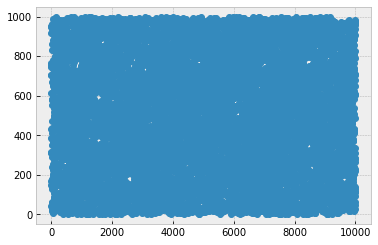

In [284]:
profit

plt.plot(np.random.randint(0,1000,10000),'o')